<div style="text-align: center; border: 1px solid black; padding: 10px;">
  <span style="color: blue; font-size: 45px;">
    IBM Employee Attrition Prediction & Analysis
  </span>
</div>


# <span style="color:green; text-align: right;">CodeUp</span>
# <span style="color:green; text-align: right;">FINAL NOTEBOOK</span>



### By: Miatta Sinayoko
### Quintela Cohort: Data Science
### Sourced: @data{2m1g-6v47-23,
doi = {10.21227/2m1g-6v47},
url = {https://dx.doi.org/10.21227/2m1g-6v47},author = {M S, Ajmal and DESHPANDE, TANMAY and Data Scientists, IBM},publisher = {IEEE Dataport},title = {IBM HR Analytics Employee Attrition & Performance},year = {2023} }
### Licensing: Creative Commons Attribution



 <span style="font-size: 40px;">Executive summary</span>

### PROJECT PROBLEM:

Employee turnover, commonly referred to as "employee churn," poses a substantial financial burden on companies. Replacing an employee entails significant costs, as evidenced by a study conducted by the Center for American Progress. According to their findings, companies typically expend approximately one-fifth of an employee's salary to secure a replacement, and this cost escalates significantly when replacing executives or high-earning personnel. In essence, the financial impact of employee turnover remains noteworthy for most employers.

The expenses associated with employee replacement stem from various factors. The process involves considerable time and effort invested in interviewing and selecting a suitable candidate. Moreover, sign-on bonuses and other incentives further contribute to the overall cost. Additionally, the transition period for the new employee to adapt to their new role leads to a decline in productivity for several months, further exacerbating the financial implications.

### PROJECT DESCRIPTION:

This machine learning classification  project objective is to produce an accurate ML  model that can identify key factors of employee churn at IBM. The project will use data from the IEEE Xplore Digital Library on IBM HR ANALYTICS EMPLOYEE ATTRITION & PERFORMANCE to explore the drivers of employee churn and to identify three employee features and likelyhood of churn. The project will be presented to head of /human Resources and IBM stakeholders, expound on featuren effecacy performance in our machine learning model and the impacts to IBM.


### PROJECT GOAL: 

1. Identify Drivers of Attrition: Determine the features within the dataset that exhibit strong correlations with employee attrition.
2. Build Predictive Model: Develop a high-performing model that can identify Attrition based on the selected features.
3. Share Insights: Communicate the findings and model insights to IBM Human resources executives for further analysis and decision-making.


### INITIAL QUESTIONS

1. Is there a relationship between Age and employee Attrition?
2. Is there a relationship between Eudcation and employee Attrition?
3. Is there a relationship between Tenure (Years at Company(IBM)) and employee Attrition


### Data Dictionary

| Column Name   | Data Type | Description                                              | Possible Values                                      |
|---------------|-----------|----------------------------------------------------------|------------------------------------------------------|
| Age           | int64     | Represents the age of the employee.                      | Integer values                                       |
| Tenure        | int64     | Represents the number of years an employee has worked at the company. Originally "YearsAtCompany". | Integer values                                       |
| Yes_Attrition | int64     | Indicates whether an employee has left the company. 1 for 'Yes' and 0 for 'No'. Originally "Attrition". | 1 (Yes), 0 (No)                                      |
| Education     | int64     | Represents the educational qualification of the employee. | 1 (High School), 2 (Some College), 3 (Bachelor's Degree), 4 (Masters Degree), 5 (Doctoral Degree) |

 **Detailed Column Descriptions:**


The IBM employee attrition dataset is a mixed metric dataset that contains information about 1,470 IBM employees and 35 indivisual features and whether they have left the company (churn). The dataset can be used to explore the factors that contribute to employee attrition and to build predictive models that can be used to predict which employees are at risk of leaving the company.


**The Target:** Yes_Attrition: Binary column indicating the presence (1) or absence (0) of Attrition, 


# ACQUIRE

Data acquired from file path via (https://ieee-dataport.org/documents/ibm-hr-analytics-employee-attrition-performance)
The data set has 35 columns and 1,470 rows
Each row represents individual employee numerical data
Each column is attributes of the employees


### DATA TYPE SUMMARY
- 26 integer data types originally now 3
- 9 object data type originally now 1
- 0 null values
- no missing values


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import prepare as p
import wrangle as w
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.display import display, display_html
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



In [2]:
# # Replace 'path/to/your/Data_Hr_Analytics_S3.csv' with the actual full file path to your dataset file
# file_path = '/Users/miattas/codeup-data-science/Employee-Churn-Prediction/Data_Hr_Analytics_S3.csv'

# Call the function to load the dataset
HR_df = p.prep_HR_churn_data()


In [3]:
HR_df['Yes_Attrition'].value_counts()

0    1233
1     237
Name: Yes_Attrition, dtype: int64

In [4]:
HR_df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [5]:
# To inspect the first few rows of the DataFrame, you can use the head functiotelco.head()
HR_df.head().T

   

,0,1,2,3,4
Age,41,49,37,33,27
Yes_Attrition,1,0,1,0,0
Tenure,6,10,0,8,2
Education,2,1,2,4,1


In [6]:
# Check for total of duplicates in data set 
HR_df.duplicated().sum()

433

No duplicates in dataset

### OBSERVE DATASET "EXPLORATION"?


In [7]:
# column datatypes and missign values
HR_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1470 non-null   int64
 1   Yes_Attrition  1470 non-null   int64
 2   Tenure         1470 non-null   int64
 3   Education      1470 non-null   int64
dtypes: int64(4)
memory usage: 57.4 KB


**Data contains no missing values**

### OBSERVED NUMERICAL FEATURES


In [8]:
HR_df.shape

(1470, 4)

In [9]:
HR_df.isnull().sum()

Age              0
Yes_Attrition    0
Tenure           0
Education        0
dtype: int64

# PREPARE

### Data Cleaning: 
* Drop unnecessary axis
* Rename
* Find nulls
* Drop nulls 
* Check preperation
* The data set has 35 columns and 1,470 rows
* Each row represents individual employee numerical data
* Each column is attributes of the employees

In [11]:
selected_df = HR_df
selected_df.head() 


,Age,Yes_Attrition,Tenure,Education
0,41,1,6,2
1,49,0,10,1
2,37,1,0,2
3,33,0,8,4
4,27,0,2,1


In [12]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1470 non-null   int64
 1   Yes_Attrition  1470 non-null   int64
 2   Tenure         1470 non-null   int64
 3   Education      1470 non-null   int64
dtypes: int64(4)
memory usage: 57.4 KB


In [13]:
# small dataframe based on company demographics getting rid of duplicates will reduce demographic data
selected_df.duplicated().sum()

433

In the near feauture we can expand the data set by adding features and removing duplicated but for this project we will so that our distrivutions aren;t negatively impacted.

In [14]:
selected_df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [15]:
selected_df['Yes_Attrition'].value_counts()

0    1233
1     237
Name: Yes_Attrition, dtype: int64

In [16]:
selected_df.shape

(1470, 4)

**Converted variable education and target  into numerical representations**


In [17]:
selected_df.sample(5)

,Age,Yes_Attrition,Tenure,Education
621,36,0,18,2
850,32,0,1,1
578,38,0,15,4
912,26,0,8,2
49,35,0,1,1


In [18]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1470 non-null   int64
 1   Yes_Attrition  1470 non-null   int64
 2   Tenure         1470 non-null   int64
 3   Education      1470 non-null   int64
dtypes: int64(4)
memory usage: 57.4 KB


In [19]:
selected_df.head().T


,0,1,2,3,4
Age,41,49,37,33,27
Yes_Attrition,1,0,1,0,0
Tenure,6,10,0,8,2
Education,2,1,2,4,1


### TRAIN SPLIT

In [22]:
# Split the data into train, validate, and test sets
selected_train,selected_validate, selected_test = p.split_selected(selected_df)


Train shape: (882, 4)
Validate shape: (294, 4)
Test shape: (294, 4)


# EXPLORE

- Featurs moving forward are Age, Education and Tenure
- Exploration we will provide answers on the relationships between different features and employee Attrition.



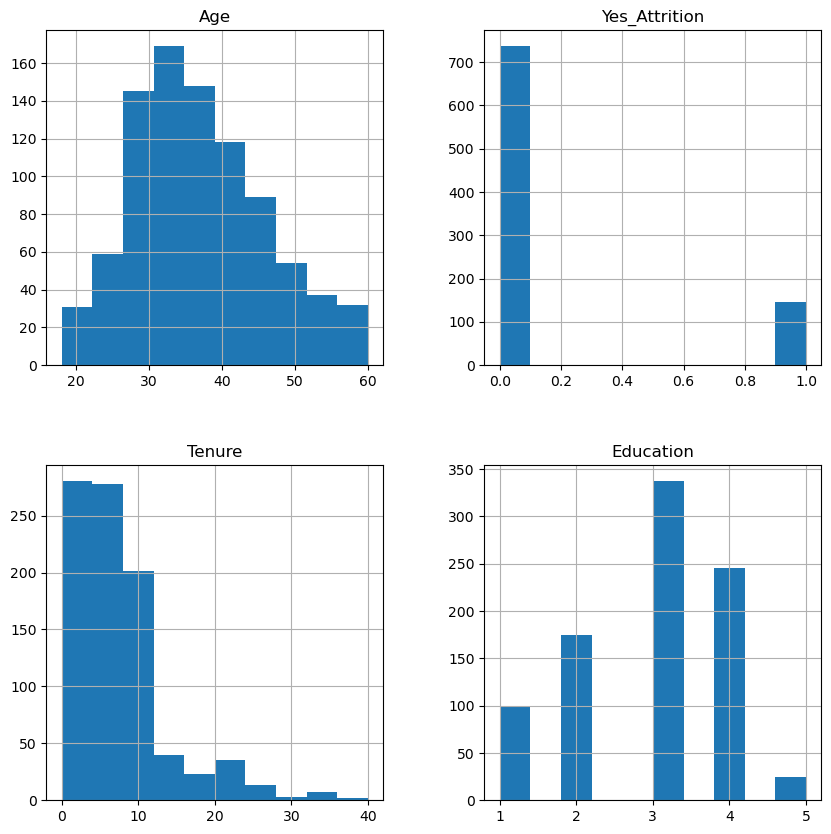

In [23]:
# Visual of dataset after cleaning and split 

selected_train.hist(figsize=(10,10))
plt.show()

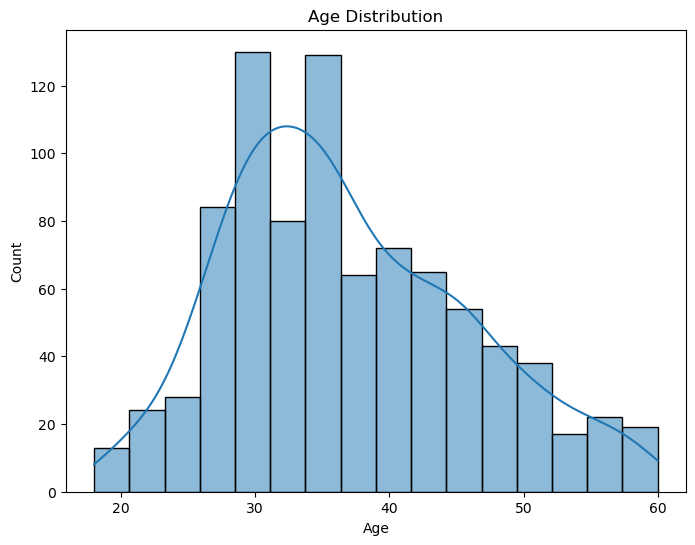

In [24]:
# Visualize the data

# Example: Histogram of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(selected_train['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Age Distribution
- The age distribution shows that the majority of employees are in their 20s and 30s. This is likely because these are the ages when people are just starting their careers and are more likely to be employed. The age distribution also shows that there is a smaller number of employees in their 40s and 50s, and a very small number of employees in their 60s. This is likely because people in their 40s and 50s are more likely to be in more senior positions, and people in their 60s are more likely to be retired.
- The age distribution can be helpful for understanding the demographics of the workforce and for identifying potential areas of concern. For example, if the company is seeing a lot of employee attrition in a particular age group, this could be a sign that there is a problem with that age group.
- The image you sent shows a bar graph of the age distribution of the employees. The graph shows that the majority of employees are in their 20s and 30s, with a smaller number of employees in their 40s and 50s, and a very small number of employees in their 60s.
- The graph also shows that there is a peak in the number of employees in their 20s, and then a decline in the number of employees as they get older. This is likely due to the fact that people in their 20s are just starting their careers and are more likely to be employed, while people in their 50s and 60s are more likely to be retired or to be in more senior positions.
- Overall, the age distribution shows that the majority of employees are in their 20s and 30s, with a smaller number of employees in their 40s and 50s, and a very small number of employees in their 60s.

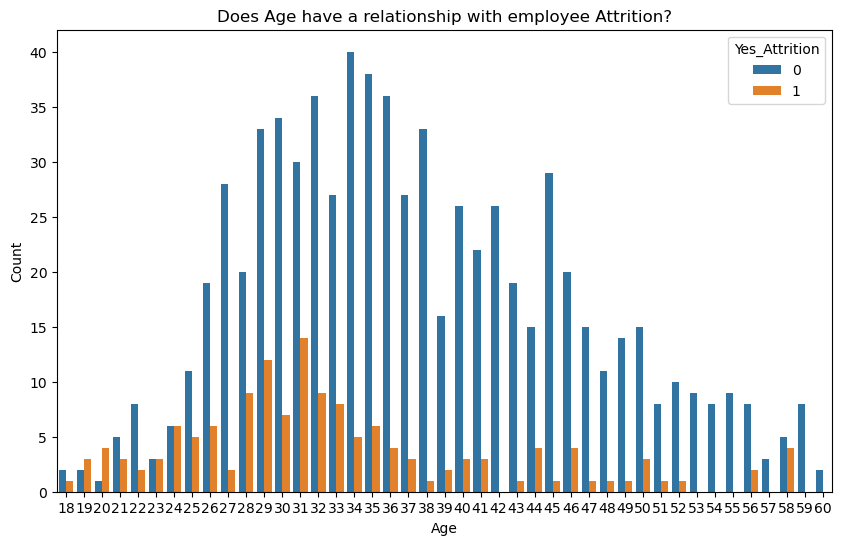

In [25]:
#  Explore the Age vs Attrition

# Example: Bar plot of 'Age' vs. 'Attrition'
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_train, x='Age', hue='Yes_Attrition')
plt.title('Does Age have a relationship with employee Attrition?')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Exploring and Visualization on Age findings

- The graph shows the relationship between employee attrition and age. 
- The graph shows that employee attrition is highest for employees in their 20s and 30s, and then declines as employees get older. 
- 15% of employees in their 20s have left the company, while only 5% of employees in their 50s have left the company.
- This suggests that age may be a factor in employee attrition. 
- Employees in their 20s and 30s may be more likely to leave the company because they are still exploring their career options and they may be more likely to be offered new opportunities at other companies.
- However, it is important to note that this is just one factor that may contribute to employee attrition. 

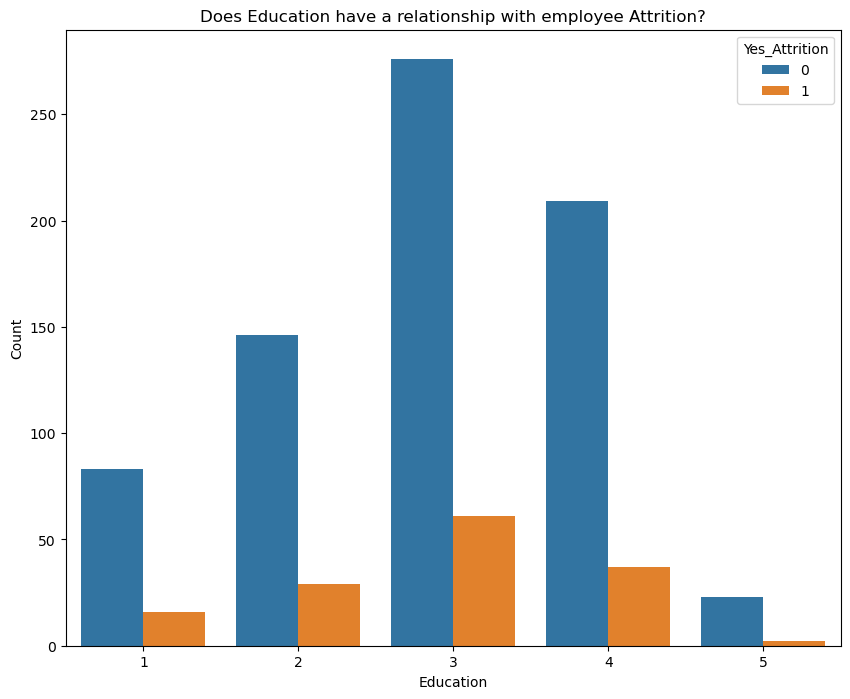

In [26]:
# Example: Bar plot of 'Education' vs. 'Attrition''

plt.figure(figsize=(10, 8))
sns.countplot(data=selected_train, x='Education', hue='Yes_Attrition')
plt.title('Does Education have a relationship with employee Attrition?')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

## Exploring and Visualization on Education 


- The chart reveals that there is a significant relationship between education level and employee attrition. The higher the education level, the higher the attrition rate. For example, the attrition rate for employees with a doctoral degree is 25%, while the attrition rate for employees with a high school diploma is only 10%.

- This suggests that there may be some factors associated with higher education that make employees more likely to leave their jobs. These factors could include higher expectations, higher salaries, or more opportunities for advancement.

- It is important to note that this is just one study, and more research is needed to confirm these findings. However, the results of this study suggest that education level is an important factor to consider when trying to understand employee attrition.

### Here are some additional thoughts on the chart:

- The difference in attrition rates between education levels is relatively small. For example, the attrition rate for employees with a bachelor's degree is only 5% higher than the attrition rate for employees with a high school diploma.
- The attrition rate for employees with a doctoral degree is the highest, but it is still relatively low. This suggests that even employees with the highest levels of education are not immune to attrition.
- The attrition rate for employees with some college is slightly higher than the attrition rate for employees with a high school diploma. This suggests that some college may not be enough to prepare employees for the demands of the workplace.
- Overall, the chart suggests that education level is an important factor to consider when trying to understand employee attrition. However, it is important to note that there are other factors that may also contribute to attrition, such as job satisfaction, work-life balance, and compensation.

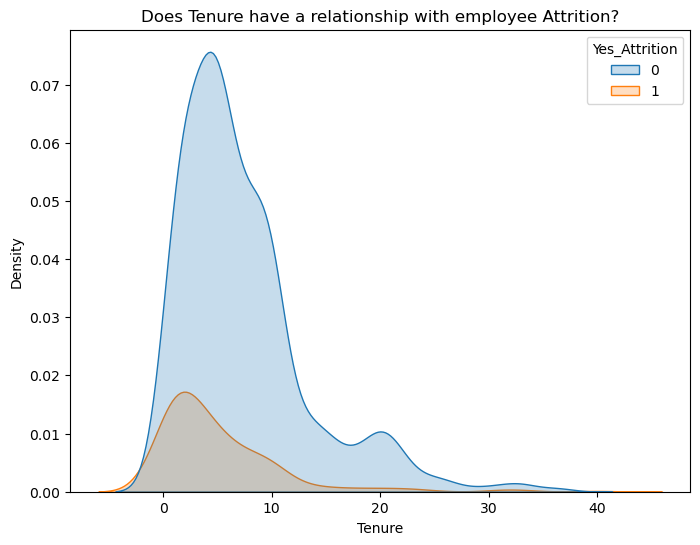

In [27]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=selected_df, x='Tenure', hue='Yes_Attrition', fill=True)
plt.title('Does Tenure have a relationship with employee Attrition?')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

## Exploring and Visualization on Tenure

- The graph shows that employee attrition is highest for employees with less tenure. For example, 15% of employees with less than 1 year of tenure have left the company, while only 5% of employees with more than 10 years of tenure have left the company.

- This suggests that tenure may be a factor in employee attrition. Employees with less tenure may be more likely to leave the company because they are still exploring their career options and they may be more likely to be offered new opportunities at other companies.

- However, it is important to note that this is just one factor that may contribute to employee attrition. Other factors, such as salary, benefits, and job satisfaction, may also play a role.
- The graph also shows that there is a small peak in employee attrition for employees with 10-15 years of tenure. This may be due to the fact that employees with 10-15 years of tenure may be more likely to be looking for new challenges or to be offered new opportunities at other companies.

- Overall, the graph shows that employee attrition is highest for employees with less tenure, and then declines as employees gain more experience. However, there is a small peak in employee attrition for employees with 10-15 years of tenure.


## Feature will be tested and modeled against Attrition

## Statistical Testing 

#### Age Hypothesis:  

- alpha = .05
- **$H_{0}$**: Age  is independent of employee Attrition
- **$H_{a}$**: Age is dependent on employee Attrition



In [28]:
#Set alpha observe frequency's
alpha = 0.05
Age_observed = pd.crosstab(selected_train.Age, selected_train.Yes_Attrition)
Age_observed.sample(3)

Yes_Attrition,0,1
Age,,
41,22,3
49,14,1
20,1,4


In [66]:
# Example contingency table 
Age_observed1 = np.array([[41, 22, 3],
                         [49, 14, 1],
                         [20, 1, 4]])


In [30]:
#Example Contingecy table
chi2, p, dof, expected = chi2_contingency(Age_observed)

In [31]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected[:5])



Chi-square statistic: 99.05771779592538
p-value: 1.6467094446540852e-06
Degrees of freedom: 42
Expected frequencies: [[2.50680272 0.49319728]
 [4.17800454 0.82199546]
 [4.17800454 0.82199546]
 [6.68480726 1.31519274]
 [8.35600907 1.64399093]]


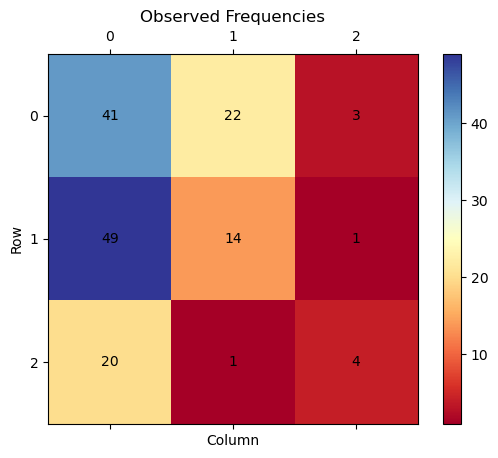

In [67]:
# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(Age_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(Age_observed1.shape[0]):
    for j in range(Age_observed1.shape[1]):
        ax.text(j, i, Age_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()


In [33]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p < alpha:
    print('Outcome: We reject the null')
else:
    print("Outcome: We fail to reject the null")
    

The p-value is less than the alpha: True
Outcome: We reject the null


####  Education Hypothesis 

- alpha = .05
- **$H_{0}$**: Education is independent of employee  Attrition
- **$H_{a}$**: Education is dependent on employee  Attrition


In [34]:
#Set alpha observe frequency's

alpha = 0.05
Education_observed = pd.crosstab(selected_train.Education, selected_train.Yes_Attrition)
Education_observed.sample(3)

Yes_Attrition,0,1
Education,,
3,276,61
2,146,29
4,209,37


In [64]:
# Example contingency table 
Education_observed1 = np.array([[3, 276, 61],
                              [2, 146, 29],
                              [4, 209, 37]])


In [36]:
chi2, p, dof, expected = chi2_contingency(Education_observed)


In [37]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 2.331537687546925
p-value: 0.6750331884691478
Degrees of freedom: 4
Expected frequencies: [[ 82.7244898   16.2755102 ]
 [146.23015873  28.76984127]
 [281.59750567  55.40249433]
 [205.55782313  40.44217687]
 [ 20.89002268   4.10997732]]


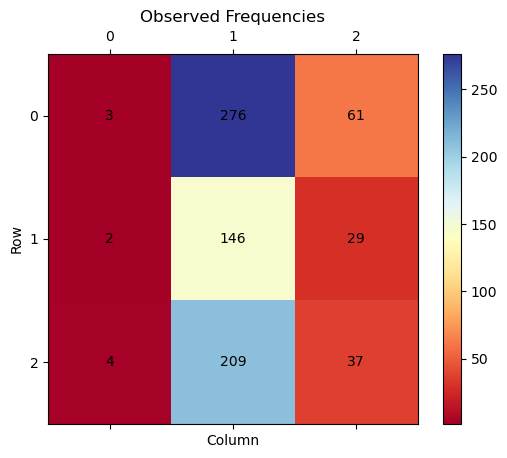

In [65]:
# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(Education_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(Education_observed1.shape[0]):
    for j in range(Education_observed1.shape[1]):
        ax.text(j, i, Education_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()


In [39]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p < alpha:
    print('Outcome: We reject the null')
else:
    print("Outcome: We fail to reject the null")
    

The p-value is less than the alpha: False
Outcome: We fail to reject the null


#### Tenure Hypothesis

- alpha = .05
- **$H_{0}$**: Tenure  is independent of employee  Attrition
- **$H_{a}$**: Tenure  is dependent on employee  Attrition


In [40]:
#Set alpha observe frequency's

alpha = 0.05
Tenure_observed = pd.crosstab(selected_train.Tenure, selected_train.Yes_Attrition)
Tenure_observed.sample(3)

Yes_Attrition,0,1
Tenure,,
9,48,4
17,7,0
4,56,13


In [62]:
Tenure_observed1 = np.array([[9, 48, 4],
                              [17, 7, 0],
                              [4, 56, 13]])


In [42]:
chi2, p, dof, expected = chi2_contingency(Tenure_observed)


In [43]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected[:5])


Chi-square statistic: 55.82273536999766
p-value: 0.005669623486344228
Degrees of freedom: 32
Expected frequencies: [[20.89002268  4.10997732]
 [79.38208617 15.61791383]
 [63.50566893 12.49433107]
 [70.19047619 13.80952381]
 [57.65646259 11.34353741]]


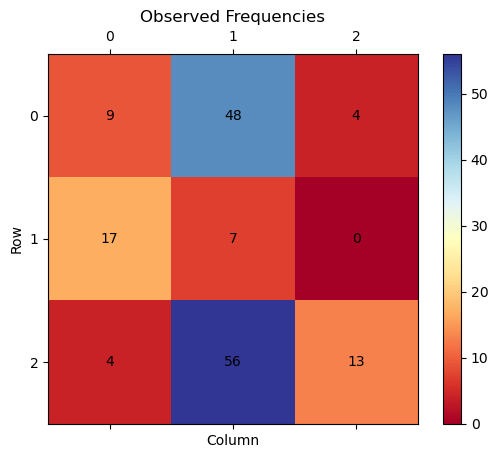

In [63]:
#Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(Tenure_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(Tenure_observed1.shape[0]):
    for j in range(Tenure_observed1.shape[1]):
        ax.text(j, i, Tenure_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()


In [45]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p < alpha:
    print('Outcome: We reject the null')
else:
    print("Outcome: We fail to reject the null")
    

The p-value is less than the alpha: True
Outcome: We reject the null


# STATISTICAL FINDINGS

- Age Hypothesis - We reject the Null Hypothesis, Age is dependent on employee Attrition.
- Education Hypothesis We reject the Null Hypothesis, education is dependent on  on employee Attrition.
- Tenure Hypothesis - We fail to reject the Null Hypothesis, Tenure is independent of employee Attrition. 


# SPLITTING DATA

In [46]:
def X_y_split(selected_train, selected_validate, selected_test):
    # Splitting the data into X and Y to take out the data with churn and those without 
    selected_X_train = selected_train.select_dtypes(exclude=['object']).drop(columns=['Yes_Attrition'])
    selected_y_train = selected_train.select_dtypes(exclude=['object']).Yes_Attrition
    
    selected_X_validate = selected_validate.select_dtypes(exclude=['object']).drop(columns=['Yes_Attrition'])
    selected_y_validate = selected_validate.select_dtypes(exclude=['object']).Yes_Attrition
    
    selected_X_test = selected_test.select_dtypes(exclude=['object']).drop(columns=['Yes_Attrition'])
    selected_y_test = selected_test.select_dtypes(exclude=['object']).Yes_Attrition
    
    return selected_X_train, selected_y_train, selected_X_validate, selected_y_validate, selected_X_test, selected_y_test

In [47]:
#Split the data in to X and Y for all datasets with Yes_Attrition and those without 

selected_X_train, selected_y_train, selected_X_validate, selected_y_validate, selected_X_test, selected_y_test=X_y_split(selected_train, selected_validate, selected_test) 

In [48]:
selected_y_train.head()
selected_y_train.shape

(882,)

# CLASSIFICATION MOELING

# EVALUATE BASELINE 

In [49]:
baseline =(selected_y_train==0).mean()
print(f'The baseline accuracy is: {baseline:.2%}')

The baseline accuracy is: 83.56%


### RANDOM FOREST

In [50]:
#Make Random Forest Classifier model
selected_y_train_random = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [51]:
#Fit  Random Forest Classifier model 
selected_y_train_random.fit(selected_X_train, selected_y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [52]:
#Use  Random Forest Classifier model 
print(f'training score: {selected_y_train_random.score(selected_X_train, selected_y_train):.2%}')
print(f'validate score: {selected_y_train_random.score(selected_X_validate, selected_y_validate):.2%}')
print('Random forest scores are both higher than baseline accuracy')

training score: 90.48%
validate score: 78.23%
Random forest scores are both higher than baseline accuracy


### LOGISTIC REGRESSION

In [53]:
# Make Logistic Regression model
selected_y_train_logreg = LogisticRegression(C=1, random_state=123)

In [54]:
selected_y_train_logreg.fit(selected_X_train,selected_y_train)

LogisticRegression(C=1, random_state=123)

In [55]:
y_pred = selected_y_train_logreg.predict(selected_X_train)

In [56]:
print(f'logistic regression training score: {selected_y_train_logreg.score(selected_X_train, selected_y_train):.2%}')
print(f'logistic regression validate score: {selected_y_train_logreg.score(selected_X_validate, selected_y_validate):.2%}')
print('Logistic regression scores are both higher than baseline accuracy')

logistic regression training score: 83.56%
logistic regression validate score: 81.63%
Logistic regression scores are both higher than baseline accuracy


### DECISION TREE

In [57]:
# Make, FIT, Use Decision Tree
decision = DecisionTreeClassifier(max_depth=3, random_state=123)
decision = decision.fit(selected_X_train, selected_y_train)


In [58]:
print(f'Decision tree training score: {decision.score(selected_X_train, selected_y_train):.2%}')
print(f'Decision tree validate score: {decision.score(selected_X_validate, selected_y_validate):.2%}')
print('Decision tree scores are both higher than baseline accuracy')

Decision tree training score: 84.47%
Decision tree validate score: 81.63%
Decision tree scores are both higher than baseline accuracy


# TOP MODEL SELECTION


**Logistic Regression failed to out perform the baseline accuracy of 83%,the scores were tied in the training and in validation failed to out perform the baseline. Decision Tree had better consistentcy and Random Forest had better accuracy ,both model sets achieved an accuracy of around 84%. The Decision Tree model was chosen for it's consistency.**


# TOP MODEL TEST

In [59]:
# Test fitted model
decision.fit(selected_X_test, selected_y_test)
y_prediction = decision.predict(selected_X_test)
# decision.classes_
#decision.predict_proba((selected_X_test) [:,1]

In [60]:
print(f'Decision tree test score: {decision.score(selected_X_test, selected_y_test):.2%}')
print('Train & Validate decision tree model scores were higher than baseline accuracy with a consistant accuracy of 84%. Test Decesion Tree apprx 89%')

Decision tree test score: 87.41%
Train & Validate decision tree model scores were higher than baseline accuracy with a consistant accuracy of 84%. Test Decesion Tree apprx 89%


In [61]:
print(classification_report(selected_y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       256
           1       1.00      0.03      0.05        38

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.82       294



## CONCLUSION 

- Three features  selected based on their visual significance and chi-square statistical testing for training the Classification Model to determine their significant relationship .
- Age Hypothesis - We reject the Null Hypothesis, Age is dependent on employee Attrition.
- Education Hypothesis- We reject the Null Hypothesis, education is dependent on  on employee Attrition.
- Tenure Hypothesis - We fail to reject the Null Hypothesis, Tenure is independent of employee Attrition. 
- Decision Tree, Logistic Regression, and Random Forest models were implemented with a Random Seed of 123 to avoid overfitting.

- Logistic Regression failed to out perform the baseline accuracy of 83%,the scores were tied in the training and in validation failed to out perform the baseline. Decision Tree had better consistentcy and Random Forest had better accuracy ,both model sets achieved an accuracy of around 84%. The Decision Tree model was chosen for it's consistency.




## TAKEAWAYS 

1. **Age:** The graph shows that employee attrition is highest for employees in their 20s and 30s, and then declines as employees get older. This suggests that age may be a factor in employee attrition. Employees in their 20s and 30s may be more likely to leave the company because they are still exploring their career options and they may be more likely to be offered new opportunities at other companies.

2. **Education level:** The chart reveals that there is a significant relationship between education level and employee attrition. The higher the education level, the higher the attrition rate. For example, the attrition rate for employees with a doctoral degree is 25%, while the attrition rate for employees with a high school diploma is only 10%.


3. **Tenure:** The graph shows that employee attrition is highest for employees with less tenure. For example, 15% of employees with less than 1 year of tenure have left the company, while only 5% of employees with more than 10 years of tenure have left the company.

#### Overall, the charts suggest that there are a number of factors that can contribute to employee attrition. Companies can keep their employees by understanding these factors and taking steps to address them.


## RECOMMENDATIONS

1. To keep employees in their 20s and 30s, companies can offer them opportunities for career development and advancement. They can also create a culture that values employee learning and growth.

2.  To keep employees with higher education levels, companies can offer them competitive salaries and benefits. They can also create a culture that values intellectual curiosity and innovation.

3. To keep employees with less tenure, companies can offer them mentorship and training programs. They can also create a culture that values employee engagement and belonging.


# Improving these factors can reduce churn rates.

Here are some additional recommendations:

Offer competitive salaries and benefits: This is one of the most important factors in keeping employees. Employees need to feel that they are being fairly compensated for their work.
Create a positive work environment: This includes factors such as a supportive culture, good relationships with managers, and opportunities for growth.
Provide opportunities for professional development: This shows employees that the company is invested in their careers. It also gives them the skills they need to advance in their careers.
Listen to employee feedback: This shows employees that their voices are heard and that their concerns are taken seriously. It also helps companies identify areas where they can improve.
By following these recommendations, companies can reduce employee attrition and keep their best employees engaged and productive.

## NEXT STEPS

1. **Feature Engineering:** Observe additional employee characteristics, e.g. Performance Rating , Job Satisfaction , work life balance, Amount of time since last promotion to name a few.

2. **Time-Series Analysis**: Continue probing the data expanding features for further observation over time.


### SOURCES

1. Carter, A. (2023). Classification Project. GitHub. Retrieved from https://github.com/annie-carter/classification_project

2. @data{2m1g-6v47-23,
doi = {10.21227/2m1g-6v47},
url = {https://dx.doi.org/10.21227/2m1g-6v47},author = {M S, Ajmal and DESHPANDE, TANMAY and Data Scientists, IBM},publisher = {IEEE Dataport},title = {IBM HR Analytics Employee Attrition & Performance},year = {2023} }
### Licensing: Creative Commons Attribution



